In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    LCE_log_norm = 255 * (LCE_log-np.min(LCE_log))/(np.max(LCE_log)-np.min(LCE_log))
    return LCE_log_norm.astype(np.uint8), a, b

In [3]:
capture = cv2.VideoCapture("Data/Videos/wymont.MOV") #Data/Videos/wymont.MOV
# Check if camera opened successfully
if (capture.isOpened()== False): 
    print("Error opening video stream or file")

# showing values of the properties
# print("CV_CAP_PROP_FRAME_WIDTH: '{}'".format(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
# print("CV_CAP_PROP_FRAME_HEIGHT : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
# print("CAP_PROP_FPS : '{}'".format(capture.get(cv2.CAP_PROP_FPS)))
# print("CAP_PROP_POS_MSEC : '{}'".format(capture.get(cv2.CAP_PROP_POS_MSEC)))
# print("CAP_PROP_FRAME_COUNT  : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
# print("CAP_PROP_BRIGHTNESS : '{}'".format(capture.get(cv2.CAP_PROP_BRIGHTNESS)))
# print("CAP_PROP_CONTRAST : '{}'".format(capture.get(cv2.CAP_PROP_CONTRAST)))
# print("CAP_PROP_SATURATION : '{}'".format(capture.get(cv2.CAP_PROP_SATURATION)))
# print("CAP_PROP_HUE : '{}'".format(capture.get(cv2.CAP_PROP_HUE)))
# print("CAP_PROP_GAIN  : '{}'".format(capture.get(cv2.CAP_PROP_GAIN)))
# print("CAP_PROP_CONVERT_RGB : '{}'".format(capture.get(cv2.CAP_PROP_CONVERT_RGB)))


frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = capture.get(cv2.CAP_PROP_FPS) 
print('Frame width:', frame_width)
print('Frame height:', frame_height)
print('FPS:', fps)

out = cv2.VideoWriter('filename.avi',cv2.VideoWriter_fourcc('M','J','P','G'), fps, (frame_width,frame_height))

# ret, frame = cap.read()
while(capture.isOpened()):
    ret, frame = capture.read()
    if ret == True:

        # Display the resulting frame
        # cv2.imshow('Frame',frame)
        LCE_log_norm, a, b = LCE(frame)
        # Merge L, a, b channels into LAB image
        Lab = cv2.merge((LCE_log_norm, a, b))
        # Convert LAB image to RGB
        BGR = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)
        # Display RGB image
        cv2.imshow('LCE_log_norm RGB Image', BGR)

        # Press Q on keyboard to  exit
        if cv2.waitKey(100) & 0xFF == 27:
            break

        # Break the loop
    else: 
        print('No frames grabbed!')
        break

    # if not ret:
    #     print('No frames grabbed!')
    #     break
    
    # LCE_log_norm, a, b = LCE(frame)
    # # Merge L, a, b channels into LAB image
    # Lab = cv2.merge((LCE_log_norm.astype(np.uint8), a, b))
    # # Convert LAB image to RGB
    # BGR = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)

    # # Display RGB image
    # cv2.imshow('LCE_log_norm RGB Image', BGR)
    # # cv2.waitKey(66)
    # # out.write(BGR)

    # # Press esc on keyboard to stop recording
    # if cv2.waitKey(1) & 0xFF == 27:
    #     break


capture.release()
out.release()
cv2.destroyAllWindows()

Frame width: 1920
Frame height: 1080
FPS: 30.00342504852152


In [2]:
def LCE(img, size=5):
    # Convert image to LAB color space
    Lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(Lab_image)
    # Avg filter L channel
    kernel = np.ones((size,size),np.float32)/size**2
    L_dst = cv2.filter2D(L,-1,kernel)
    
    mask1 = L_dst > 1
    mask2 = L > 1
    mask = mask1 & mask2
    # Compute LCE using the mask
    LCE_log = np.zeros_like(L)
    L_div = np.divide(L, L_dst, where=mask1)
    LCE_log= np.log(L_div, where =mask)
    # min = np.min(LCE_log)
    min = -4.5
    # print("min:", min)
    # max = np.max(LCE_log)
    max = 4.5
    # print("max:", max)
    LCE_log_norm = 255 * (LCE_log-min)/(max-min)
    return LCE_log_norm.astype(np.uint8), a, b

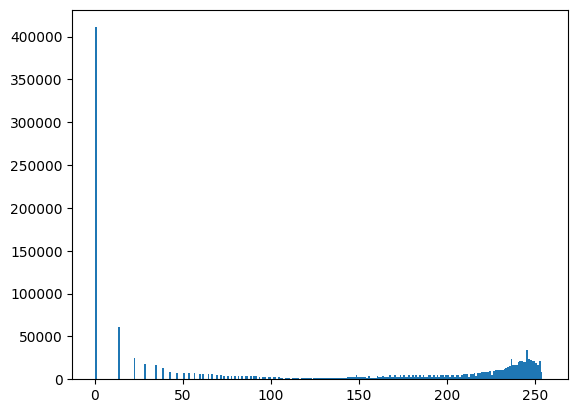

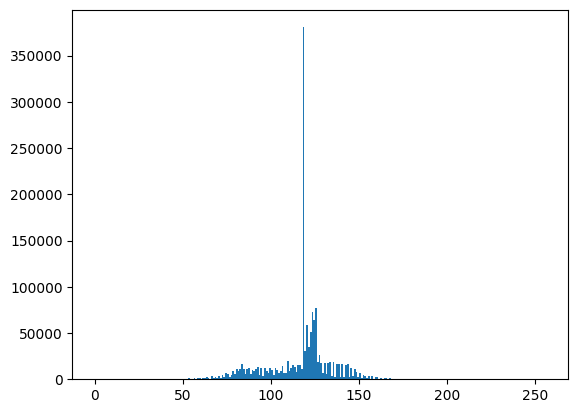

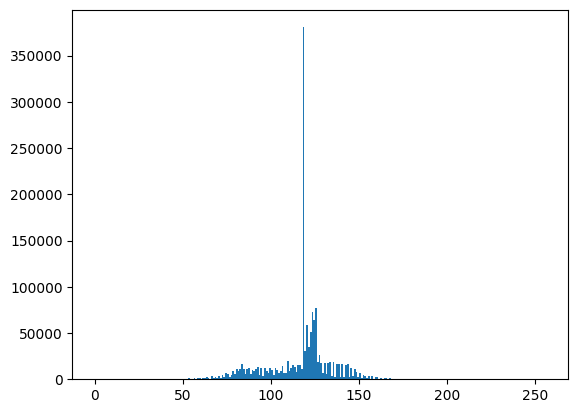

In [6]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt


flag = False
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# /home/jj/Documents/AirSim/2023-06-08-16-28-15/images
for filename in sorted(glob.glob('/home/jj/Documents/AirSim/2023-06-08-16-28-15/images/*.ppm')):
    # print(filename)
    frame = cv2.imread(filename)
    # if not flag:
    #     height, width, layers = img.shape
    #     frameSize = (width,height)
    #     # out = cv2.VideoWriter('test.mp4',
    #     #                         cv2.VideoWriter_fourcc(*'mp4v'), 30, frameSize)
    #     flag = True
    #     continue

    # out.write(img)
    LCE_log_norm, a, b = LCE(frame)
    # create a CLAHE object (Arguments are optional).

   
    Lab = cv2.merge((LCE_log_norm, a, b))
    BGR = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)
    
    cv2.imshow('RGB Image', frame)
    plt.hist(frame.ravel(),256,[0,256]); plt.show()

    cv2.imshow('LCE_log_norm RGB Image', BGR)
    plt.hist(BGR.ravel(),256,[0,256]); plt.show()

    cl1 = clahe.apply(LCE_log_norm)
    # Merge L, a, b channels into LAB image
    Lab = cv2.merge((cl1.astype(np.uint8), a, b))
    # Convert LAB image to RGB
    RGB = cv2.cvtColor(Lab, cv2.COLOR_LAB2BGR)
    # Display RGB image
    cv2.imshow('CLAHE RGB Image', RGB)
    plt.hist(BGR.ravel(),256,[0,256]); plt.show()
    # cv2.waitKey(0)
    # Press esc on keyboard to stop recording
    if cv2.waitKey(0) & 0xFF == 27:
        break

# out.release()
plt.show()
# capture.release()
# out.release()
cv2.destroyAllWindows()